<a href="https://colab.research.google.com/github/felipe24I/parcial1/blob/main/punto2_parcial1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.         0.03141593 0.06283185 0.09424778 0.12566371 0.15707963
 0.18849556 0.21991149 0.25132741 0.28274334 0.31415927 0.34557519
 0.37699112 0.40840704 0.43982297 0.4712389  0.50265482 0.53407075
 0.56548668 0.5969026  0.62831853 0.65973446 0.69115038 0.72256631
 0.75398224 0.78539816 0.81681409 0.84823002 0.87964594 0.91106187
 0.9424778  0.97389372 1.00530965 1.03672558 1.0681415  1.09955743
 1.13097336 1.16238928 1.19380521 1.22522113]
(40,)
[-7.         -0.30196805  9.27947505  6.9615071  -3.53837621 -7.20446707
 -0.79623712  4.77332189  2.07187503 -4.43183229 -7.04180678 -3.61841995
  2.10519412  3.96127437 -0.8628194  -6.3951469  -3.43864245  6.15627223
  9.14675717  0.49783041 -6.83452067 -1.09498813  9.08151194  7.74641819
 -3.30826147 -7.97995217 -1.05811737  5.53807982  2.36508138 -5.18457987
 -7.36584728 -2.87894576  2.45952505  3.23631432 -1.24684623 -5.68591741
 -3.02556408  5.46396331  8.70532036  1.17205715]
(40,)


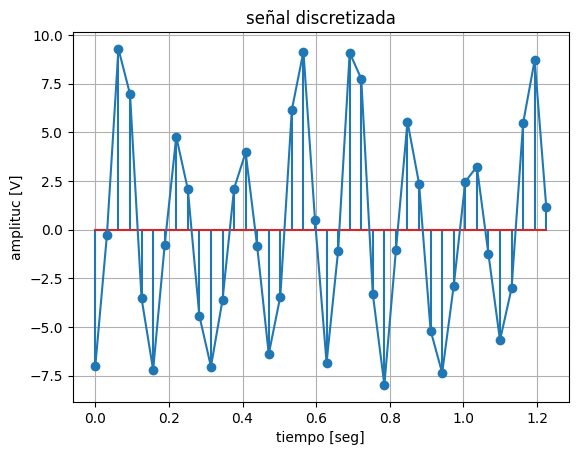

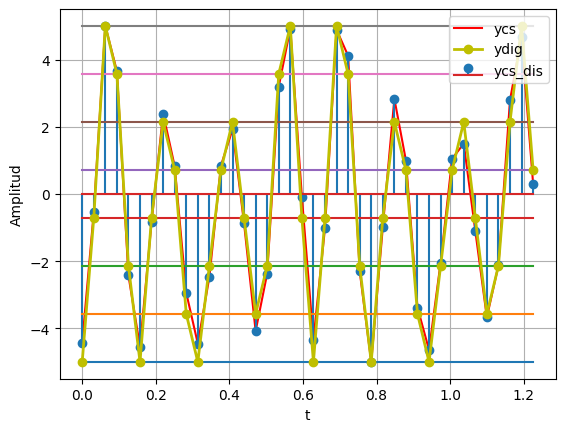

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#Datos señal continua x1(t)
A1=7 #amplitud
f1=(20/np.pi)  #frecuencia
T1=1/f1 #periodo

#Datos señal continua x2(t)
A2=-2 #amplitud
f2=(5/2*np.pi)  #frecuencia
T2=1/f2 #periodo

#Datos señal continua x3(t)
A3=2 #amplitud
f3=(5/np.pi)  #frecuencia
T3=1/f3#periodo

#Discretizar tiempo
ti=0 #tiempo inicial
tf=2*T3 #tiempo final
Fs=100/np.pi #frecuencia de muestreo
Ts=1/Fs #tiempo de muestreo

#Crear vector discretizado
tv=np.arange(ti,tf,Ts)
print(tv)
print(tv.shape)

#Discretizar señal
xv=A1*np.sin((2*np.pi*f1*tv)-(np.pi/2))+A2*np.cos((2*np.pi*f2*tv))+A3*np.cos((2*np.pi*f3*tv))
print(xv)
print(xv.shape)

#imprimir señal discretizada
plt.stem(tv,xv)
plt.plot(tv,xv)
plt.title("señal discretizada")
plt.xlabel("tiempo [seg]")
plt.ylabel("amplituc [V]")
plt.grid()
plt.show()

#Acondicionar la señal (modificar amplitud)
y_max=5
y_min=-5
def modificar_amplitud (x,ymin,ymax):
  #Vamos a hallar la pendiente
  xmin=min(x) #Esta función me saca el minimo de la señal discretizada
  xmax=max(x) #Esta función me saca el maximo de la señal discretizada
  m=(ymax-ymin)/(xmax-xmin) #Aquí modificamos la pendiente para escalar la señal y que el dispositivo que trabaja de -5 a 5v la reciba de -5 a 5v
  c=ymax-m*xmax #Hallamos la c, porque la ecuación y=mx+c lo requiere y para que se mantenga la forma de la señal original
  yv=m*x+c #aqui calculamos la señal discretizada de -5 a 5v
  return yv

#vamos a pasarle los datos a la función modificar_amplitud para que nos calcule la señal acondicionada (yv)
yv= modificar_amplitud(xv,y_min,y_max)

#Vamos a cuantizar la señal

#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]


#recorrer vector cero y spam discretizado para cuantizar

for i in range(yv.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(yv[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(yv[i],ve)) #apilar datos cuantizando si i>0


#graficar señales

plt.plot(tv,yv,c='r', label='ycs')#cs continua

plt.stem(tv,yv, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()